In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [26]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [28]:
from pandas import ExcelFile

In [29]:
df = pd.read_excel('FRT Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,18367,18067,18467,18000,1.31M,0.0166
1,2021-07-02,18333,18367,18500,18267,1.59M,-0.0019
2,2021-07-05,19600,18533,19600,18533,6.29M,0.0691
3,2021-07-06,18233,20133,20333,18233,3.76M,-0.0697
4,2021-07-07,19500,18667,19500,18067,2.81M,0.0695


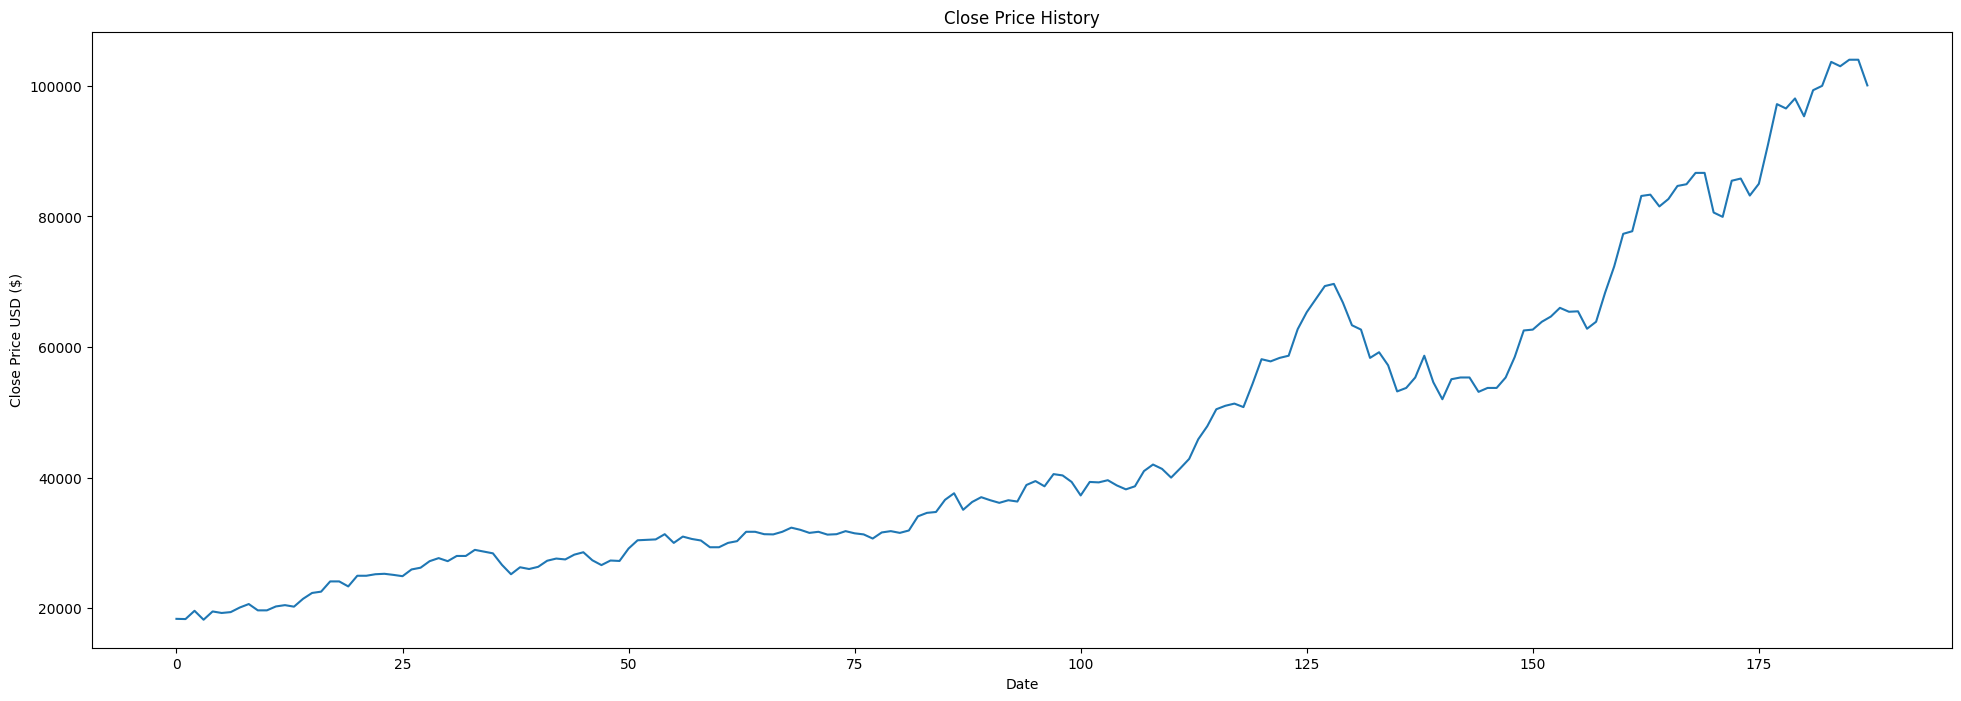

In [30]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [31]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [32]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00156237],
       [0.00116595],
       [0.01593853],
       [0.        ],
       [0.01477258],
       [0.01205592],
       [0.01360663],
       [0.02176828],
       [0.02798279],
       [0.01671972],
       [0.01671972],
       [0.02371542],
       [0.02604731],
       [0.02331899],
       [0.03731039],
       [0.04780393],
       [0.05013583],
       [0.06840626],
       [0.06840626],
       [0.05946343],
       [0.07851505],
       [0.07851505],
       [0.08123171],
       [0.0820129 ],
       [0.08006576],
       [0.07773386],
       [0.08977812],
       [0.09289121],
       [0.1045507 ],
       [0.10999569],
       [0.1045507 ],
       [0.1138783 ],
       [0.1138783 ],
       [0.12475661],
       [0.12165518],
       [0.1185421 ],
       [0.09793977],
       [0.08123171],
       [0.09367239],
       [0.09055931],
       [0.09444192],
       [0.10533189],
       [0.1092145 ],
       [0.10766379],
       [0.1162102 ],
       [0.12048923],
       [0.10610141],
       [0.097

In [33]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00156237, 0.00116595, 0.01593853, 0.        , 0.01477258,
       0.01205592, 0.01360663, 0.02176828, 0.02798279, 0.01671972,
       0.01671972, 0.02371542, 0.02604731, 0.02331899, 0.03731039,
       0.04780393, 0.05013583, 0.06840626, 0.06840626, 0.05946343,
       0.07851505, 0.07851505, 0.08123171, 0.0820129 , 0.08006576,
       0.07773386, 0.08977812, 0.09289121, 0.1045507 , 0.10999569,
       0.1045507 , 0.1138783 , 0.1138783 , 0.12475661, 0.12165518,
       0.1185421 , 0.09793977, 0.08123171, 0.09367239, 0.09055931,
       0.09444192, 0.10533189, 0.1092145 , 0.10766379, 0.1162102 ,
       0.12048923, 0.10610141, 0.097555  , 0.10571665, 0.10493546,
       0.12708851, 0.14186109, 0.14264228, 0.1434118 , 0.1527394 ,
       0.13719729, 0.14847202, 0.14419299, 0.14147633, 0.12942041])]
[0.12942040645003325]

[array([0.00156237, 0.00116595, 0.01593853, 0.        , 0.01477258,
       0.01205592, 0.01360663, 0.02176828, 0.02798279, 0.01671972,
       0.01671972, 0.02371542, 0.02

In [34]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 12ms/step - loss: 0.0044
Epoch 2/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 3/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0031
Epoch 4/25
66/66 [==============================] - 1s 12ms/step - loss: 9.0517e-04
Epoch 5/25
66/66 [==============================] - 1s 12ms/step - loss: 5.7893e-04
Epoch 6/25
66/66 [==============================] - 1s 12ms/step - loss: 5.9364e-04
Epoch 7/25
66/66 [==============================] - 1s 11ms/step - loss: 7.1981e-04
Epoch 8/25
66/66 [==============================] - 1s 11ms/step - loss: 8.7519e-04
Epoch 9/25
66/66 [==============================] - 1s 12ms/step - loss: 9.7691e-04
Epoch 10/25
66/66 [==============================] - 1s 11ms/step - loss: 5.7897e-04
Epoch 11/25
66/66 [==============================] - 1s 12ms/step - loss: 5.4700e-04
Epoch 12/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch

In [35]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 15ms/step


7936.838896583595

C:\Users\DELL\AppData\Local\Temp\ipykernel_25516\59967098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


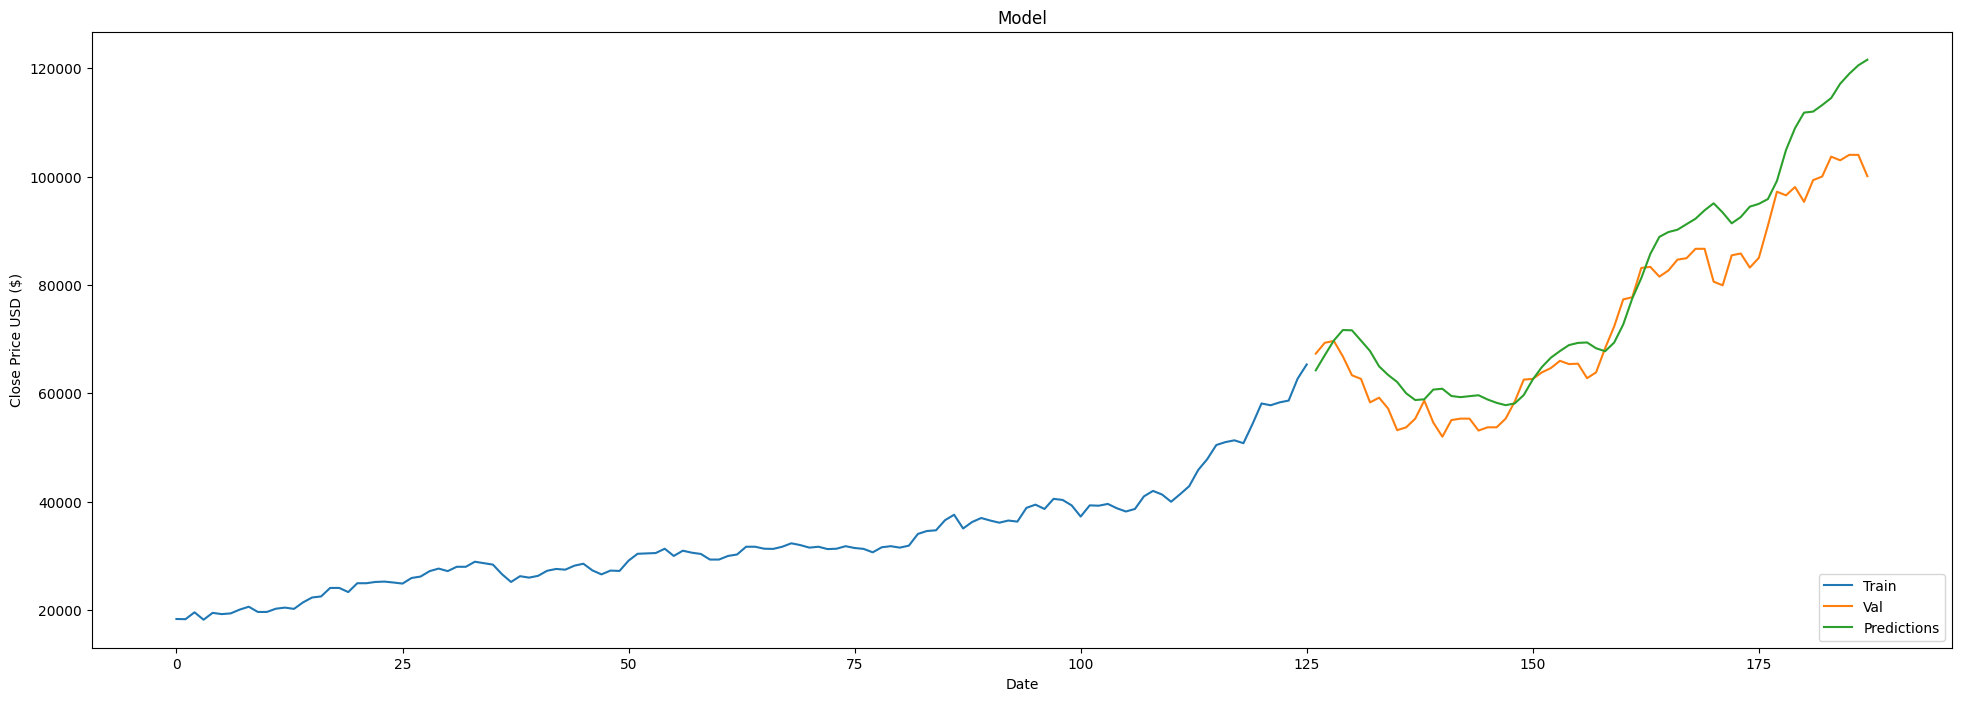

In [36]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(24,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()